In [1]:
#Basic Libs
import pandas as pd
import glob
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 9000)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numerize import numerize
import missingno as mso # missging values visualization
import plotly.express as px
import plotly.graph_objects as go

# Time
import time

# Stats
from scipy.stats import norm
from scipy.stats import shapiro
from statsmodels.graphics.gofplots import qqplot

# Warnings
import warnings
warnings.filterwarnings("ignore")
import os

In [2]:
# specifying the path to csv files
path = os.getcwd()
  
# csv files in the path
files = glob.glob(path + "/*.csv")
  
# defining an empty list to store 
# content
data_frame = pd.DataFrame()
content = []
  
# checking all the csv files in the 
# specified path
for filename in files:
    
    # reading content of csv file
    # content.append(filename)
    df = pd.read_csv(filename, index_col=None,nrows=1000)
    content.append(df)
  
# converting content to data frame
data_frame = pd.concat(content)
print(data_frame)

         DR_NO               Date Rptd                DATE OCC  TIME OCC  AREA    AREA NAME  Rpt Dist No  Part 1-2  Crm Cd                                        Crm Cd Desc                        Mocodes  Vict Age Vict Sex Vict Descent  Premis Cd                                   Premis Desc  Weapon Used Cd                                     Weapon Desc Status   Status Desc  Crm Cd 1  Crm Cd 2  Crm Cd 3  Crm Cd 4                                  LOCATION Cross Street      LAT       LON
0     10304468  01/08/2020 12:00:00 AM  01/08/2020 12:00:00 AM      2230     3    Southwest          377         2     624                           BATTERY - SIMPLE ASSAULT                      0444 0913        36        F            B        501                        SINGLE FAMILY DWELLING           400.0  STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)     AO   Adult Other       624       NaN       NaN       NaN   1100 W  39TH                         PL          NaN  34.0141 -118.2978
1    190101086

In [3]:
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,0444 0913,36,F,B,501,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,624,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,0416 1822 1414,25,M,H,102,SIDEWALK,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,624,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,1501,0,X,X,726,POLICE FACILITY,NaN,NaN,AA,Adult Arrest,845,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1402,76,F,W,502,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,745,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,31,X,X,409,BEAUTY SUPPLY STORE,NaN,NaN,IC,Invest Cont,740,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468


In [4]:
df['Crm Cd Desc'].unique()

array(['BATTERY - SIMPLE ASSAULT',
       'SEX OFFENDER REGISTRANT OUT OF COMPLIANCE',
       'VANDALISM - MISDEAMEANOR ($399 OR UNDER)',
       'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)',
       'RAPE, FORCIBLE', 'SHOPLIFTING - PETTY THEFT ($950 & UNDER)',
       'OTHER MISCELLANEOUS CRIME',
       'THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD',
       'BURGLARY FROM VEHICLE', 'CRIMINAL THREATS - NO WEAPON DISPLAYED',
       'ARSON', 'INTIMATE PARTNER - SIMPLE ASSAULT',
       'THEFT PLAIN - PETTY ($950 & UNDER)', 'THEFT OF IDENTITY',
       'ROBBERY', 'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT',
       'BURGLARY', 'VEHICLE - STOLEN',
       'THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)',
       'BRANDISH WEAPON', 'INTIMATE PARTNER - AGGRAVATED ASSAULT',
       'BUNCO, GRAND THEFT', 'THEFT, PERSON',
       'BATTERY WITH SEXUAL CONTACT', 'BIKE - STOLEN',
       'BATTERY POLICE (SIMPLE)',
       'LETTERS, LEWD  -  TELEPHONE CALLS, LEWD',
       'VIOLAT

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   DR_NO           1000 non-null   int64  
 1   Date Rptd       1000 non-null   object 
 2   DATE OCC        1000 non-null   object 
 3   TIME OCC        1000 non-null   int64  
 4   AREA            1000 non-null   int64  
 5   AREA NAME       1000 non-null   object 
 6   Rpt Dist No     1000 non-null   int64  
 7   Part 1-2        1000 non-null   int64  
 8   Crm Cd          1000 non-null   int64  
 9   Crm Cd Desc     1000 non-null   object 
 10  Mocodes         930 non-null    object 
 11  Vict Age        1000 non-null   int64  
 12  Vict Sex        938 non-null    object 
 13  Vict Descent    938 non-null    object 
 14  Premis Cd       1000 non-null   int64  
 15  Premis Desc     1000 non-null   object 
 16  Weapon Used Cd  391 non-null    float64
 17  Weapon Desc     391 non-null    ob

In [6]:
df.shape

(1000, 28)

In [7]:
df['Date Rptd'].unique()

array(['01/08/2020 12:00:00 AM', '01/02/2020 12:00:00 AM',
       '04/14/2020 12:00:00 AM', '01/01/2020 12:00:00 AM',
       '01/04/2020 12:00:00 AM', '06/19/2020 12:00:00 AM',
       '01/05/2020 12:00:00 AM', '01/07/2020 12:00:00 AM',
       '11/26/2021 12:00:00 AM', '11/29/2020 12:00:00 AM',
       '02/22/2020 12:00:00 AM', '11/22/2021 12:00:00 AM',
       '01/14/2020 12:00:00 AM', '09/10/2020 12:00:00 AM',
       '01/15/2020 12:00:00 AM', '11/18/2021 12:00:00 AM',
       '11/29/2021 12:00:00 AM', '02/15/2020 12:00:00 AM',
       '01/19/2020 12:00:00 AM', '10/15/2020 12:00:00 AM',
       '01/20/2020 12:00:00 AM', '01/23/2020 12:00:00 AM',
       '11/24/2021 12:00:00 AM', '07/29/2020 12:00:00 AM',
       '09/15/2020 12:00:00 AM', '01/27/2020 12:00:00 AM',
       '12/04/2020 12:00:00 AM', '08/27/2020 12:00:00 AM',
       '01/28/2020 12:00:00 AM', '06/20/2020 12:00:00 AM',
       '01/30/2020 12:00:00 AM', '01/31/2020 12:00:00 AM',
       '02/04/2020 12:00:00 AM', '06/15/2022 12:00:00 AM

In [8]:
df['DATE OCC'].unique()

array(['01/08/2020 12:00:00 AM', '01/01/2020 12:00:00 AM',
       '02/13/2020 12:00:00 AM', '01/02/2020 12:00:00 AM',
       '01/04/2020 12:00:00 AM', '05/26/2020 12:00:00 AM',
       '01/05/2020 12:00:00 AM', '01/07/2020 12:00:00 AM',
       '11/30/2020 12:00:00 AM', '11/28/2020 12:00:00 AM',
       '02/22/2020 12:00:00 AM', '11/19/2020 12:00:00 AM',
       '01/14/2020 12:00:00 AM', '09/09/2020 12:00:00 AM',
       '01/15/2020 12:00:00 AM', '12/28/2020 12:00:00 AM',
       '11/01/2020 12:00:00 AM', '02/15/2020 12:00:00 AM',
       '01/19/2020 12:00:00 AM', '10/15/2020 12:00:00 AM',
       '01/20/2020 12:00:00 AM', '01/23/2020 12:00:00 AM',
       '04/28/2020 12:00:00 AM', '07/29/2020 12:00:00 AM',
       '09/03/2020 12:00:00 AM', '01/27/2020 12:00:00 AM',
       '12/03/2020 12:00:00 AM', '08/27/2020 12:00:00 AM',
       '01/28/2020 12:00:00 AM', '06/20/2020 12:00:00 AM',
       '01/29/2020 12:00:00 AM', '01/30/2020 12:00:00 AM',
       '02/04/2020 12:00:00 AM', '11/12/2020 12:00:00 AM

In [9]:
print("==="*25)
print("Data Information")
print("==="*25)
print(df.info())

Data Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   DR_NO           1000 non-null   int64  
 1   Date Rptd       1000 non-null   object 
 2   DATE OCC        1000 non-null   object 
 3   TIME OCC        1000 non-null   int64  
 4   AREA            1000 non-null   int64  
 5   AREA NAME       1000 non-null   object 
 6   Rpt Dist No     1000 non-null   int64  
 7   Part 1-2        1000 non-null   int64  
 8   Crm Cd          1000 non-null   int64  
 9   Crm Cd Desc     1000 non-null   object 
 10  Mocodes         930 non-null    object 
 11  Vict Age        1000 non-null   int64  
 12  Vict Sex        938 non-null    object 
 13  Vict Descent    938 non-null    object 
 14  Premis Cd       1000 non-null   int64  
 15  Premis Desc     1000 non-null   object 
 16  Weapon Used Cd  391 non-null    float64
 17  Weapon Desc     3

In [10]:
#Checking null values percentage
print("==="*25)
print("Checking Data has null values or not")
print("==="*25)
print(round(df.isnull().sum() * 100 / len(df),2))

Checking Data has null values or not
DR_NO               0.0
Date Rptd           0.0
DATE OCC            0.0
TIME OCC            0.0
AREA                0.0
AREA NAME           0.0
Rpt Dist No         0.0
Part 1-2            0.0
Crm Cd              0.0
Crm Cd Desc         0.0
Mocodes             7.0
Vict Age            0.0
Vict Sex            6.2
Vict Descent        6.2
Premis Cd           0.0
Premis Desc         0.0
Weapon Used Cd     60.9
Weapon Desc        60.9
Status              0.0
Status Desc         0.0
Crm Cd 1            0.0
Crm Cd 2           92.4
Crm Cd 3          100.0
Crm Cd 4          100.0
LOCATION            0.0
Cross Street       74.3
LAT                 0.0
LON                 0.0
dtype: float64


In [11]:
#Drop Columns
df.drop(columns=['Weapon Used Cd','Weapon Desc','Crm Cd 2','Crm Cd 3','Crm Cd 4','Cross Street'],inplace=True,axis=1)
df.drop(columns=['Crm Cd 1'],inplace=True,axis=1)

In [12]:
#Data Shape
print("**"*30)
print(f"Shape of the data are as follow {df.shape[0]} rows & {df.shape[1]} Columns")
print("**"*30)

************************************************************
Shape of the data are as follow 1000 rows & 21 Columns
************************************************************


In [13]:
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Status,Status Desc,LOCATION,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,0444 0913,36,F,B,501,SINGLE FAMILY DWELLING,AO,Adult Other,1100 W 39TH PL,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,0416 1822 1414,25,M,H,102,SIDEWALK,IC,Invest Cont,700 S HILL ST,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,1501,0,X,X,726,POLICE FACILITY,AA,Adult Arrest,200 E 6TH ST,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1402,76,F,W,502,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,Invest Cont,5400 CORTEEN PL,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,31,X,X,409,BEAUTY SUPPLY STORE,IC,Invest Cont,14400 TITUS ST,34.2198,-118.4468


In [14]:
#Changing Datatype
df['Vict Descent'].fillna(value='None',inplace=True)
df['Vict Sex'].fillna(value='None',inplace=True)
df['Mocodes'].fillna(value='none',inplace=True)
df['Premis Desc'].fillna(value='None',inplace=True)

In [15]:
df['Date Rptd'] = df['Date Rptd'].str[:10]
df['DATE OCC'] = df['Date Rptd'].str[:10]
df['Date Rptd']= pd.to_datetime(df['Date Rptd'])
df['DATE OCC']= pd.to_datetime(df['DATE OCC'])

In [16]:
df.isnull().sum()

DR_NO           0
Date Rptd       0
DATE OCC        0
TIME OCC        0
AREA            0
AREA NAME       0
Rpt Dist No     0
Part 1-2        0
Crm Cd          0
Crm Cd Desc     0
Mocodes         0
Vict Age        0
Vict Sex        0
Vict Descent    0
Premis Cd       0
Premis Desc     0
Status          0
Status Desc     0
LOCATION        0
LAT             0
LON             0
dtype: int64

In [17]:
#Change Dtype of Columns
for column in df.columns:
    if df[column].dtype == 'int':
        df[column] = df[column].astype(int)

In [18]:
number=df.select_dtypes(include=np.number)
category=df.select_dtypes(include=object)

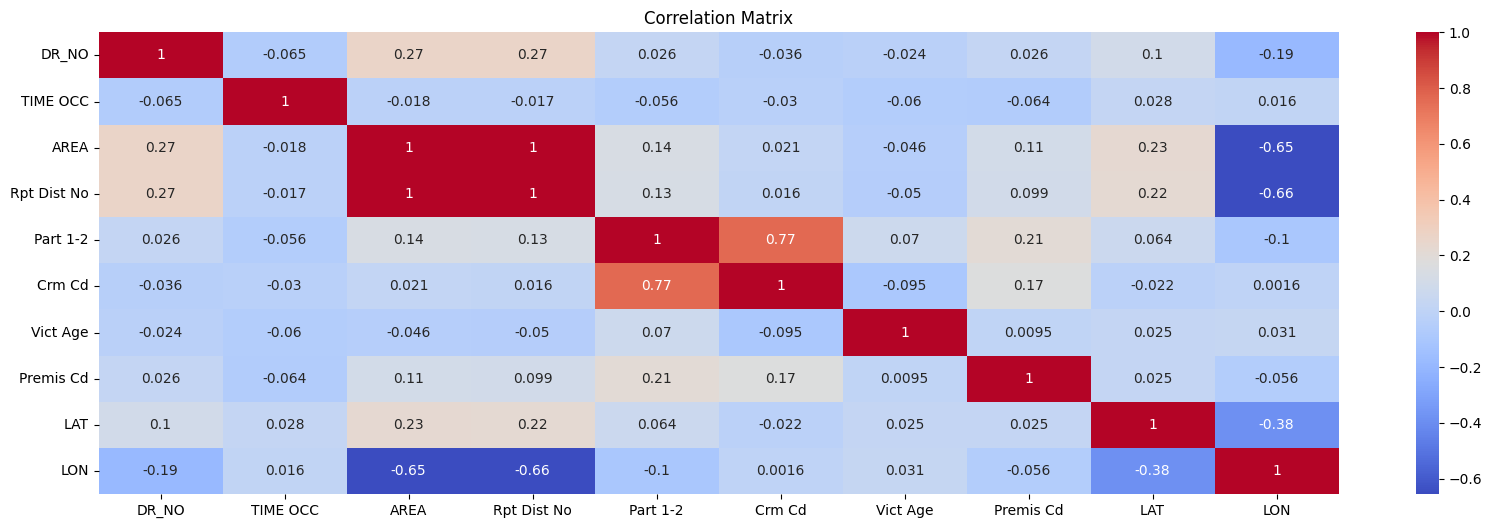

In [19]:
# Calculate the correlation matrix
numerical_columns = df.select_dtypes(include=['int64','float64']).corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(20, 6))
sns.heatmap(numerical_columns, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [20]:
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Status,Status Desc,LOCATION,LAT,LON
0,10304468,2020-01-08,2020-01-08,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,0444 0913,36,F,B,501,SINGLE FAMILY DWELLING,AO,Adult Other,1100 W 39TH PL,34.0141,-118.2978
1,190101086,2020-01-02,2020-01-02,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,0416 1822 1414,25,M,H,102,SIDEWALK,IC,Invest Cont,700 S HILL ST,34.0459,-118.2545
2,200110444,2020-04-14,2020-04-14,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,1501,0,X,X,726,POLICE FACILITY,AA,Adult Arrest,200 E 6TH ST,34.0448,-118.2474
3,191501505,2020-01-01,2020-01-01,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1402,76,F,W,502,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,Invest Cont,5400 CORTEEN PL,34.1685,-118.4019
4,191921269,2020-01-01,2020-01-01,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,31,X,X,409,BEAUTY SUPPLY STORE,IC,Invest Cont,14400 TITUS ST,34.2198,-118.4468


In [21]:
# Convert correlation matrix to 1-D Series and sort
sorted_mat = numerical_columns.unstack().sort_values()
highest_corr_pairs = sorted_mat.nlargest(30)
print(highest_corr_pairs)

DR_NO        DR_NO          1.000000
Premis Cd    Premis Cd      1.000000
Vict Age     Vict Age       1.000000
Crm Cd       Crm Cd         1.000000
Part 1-2     Part 1-2       1.000000
Rpt Dist No  Rpt Dist No    1.000000
AREA         AREA           1.000000
TIME OCC     TIME OCC       1.000000
LAT          LAT            1.000000
LON          LON            1.000000
Rpt Dist No  AREA           0.998057
AREA         Rpt Dist No    0.998057
Part 1-2     Crm Cd         0.765979
Crm Cd       Part 1-2       0.765979
AREA         DR_NO          0.267787
DR_NO        AREA           0.267787
Rpt Dist No  DR_NO          0.265512
DR_NO        Rpt Dist No    0.265512
LAT          AREA           0.228763
AREA         LAT            0.228763
Rpt Dist No  LAT            0.221219
LAT          Rpt Dist No    0.221219
Part 1-2     Premis Cd      0.207252
Premis Cd    Part 1-2       0.207252
Crm Cd       Premis Cd      0.166715
Premis Cd    Crm Cd         0.166715
Part 1-2     AREA           0.135742
A

In [22]:
#Descriptive Stats
number.describe().T

,count,mean,std,min,25%,50%,75%,max
DR_NO,1000.0,2.007867e+08,6.889409e+06,1.030447e+07,2.001047e+08,2.001053e+08,2.001059e+08,2.220130e+08
TIME OCC,1000.0,1.323103e+03,6.665112e+02,1.000000e+00,9.000000e+02,1.405000e+03,1.900000e+03,2.355000e+03
AREA,1000.0,2.601000e+00,3.871794e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.100000e+01
Rpt Dist No,1000.0,3.104880e+02,3.846204e+02,1.010000e+02,1.437500e+02,1.620000e+02,1.920000e+02,2.137000e+03
Part 1-2,1000.0,1.419000e+00,4.936423e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00
Crm Cd,1000.0,5.122670e+02,2.137893e+02,1.210000e+02,3.300000e+02,4.420000e+02,6.260000e+02,9.560000e+02
Vict Age,1000.0,3.248800e+01,1.972316e+01,0.000000e+00,2.300000e+01,3.200000e+01,4.600000e+01,9.400000e+01
Premis Cd,1000.0,3.107120e+02,2.465581e+02,1.010000e+02,1.020000e+02,1.495000e+02,5.020000e+02,9.660000e+02
LAT,1000.0,3.404990e+01,5.456524e-02,3.371470e+01,3.404310e+01,3.404730e+01,3.405490e+01,3.430550e+01
LON,1000.0,-1.182696e+02,5.903224e-02,-1.185884e+02,-1.182631e+02,-1.182527e+02,-1.182442e+02,-1.181614e+02


In [23]:
category.describe().T

,count,unique,top,freq
AREA NAME,1000,21,Central,794
Crm Cd Desc,1000,64,BURGLARY FROM VEHICLE,127
Mocodes,1000,717,none,70
Vict Sex,1000,4,M,511
Vict Descent,1000,11,H,306
Premis Desc,1000,82,STREET,215
Status,1000,4,IC,834
Status Desc,1000,4,Invest Cont,834
LOCATION,1000,525,700 W 7TH ST,34


In [24]:
# Now let's check your skewness and kurtosis of each numerical variable.
for col in number:
    print(f"{col}:")
    print(f"Skewness = {df[col].skew()}")
    print(f"Kurtosis = {df[col].kurt()}")
    print("=="*20)

DR_NO:
Skewness = -20.71340281843546
Kurtosis = 586.7142569533668
TIME OCC:
Skewness = -0.44762810388415214
Kurtosis = -0.8380989861701087
AREA:
Skewness = 2.6951785008740443
Kurtosis = 6.828237087538781
Rpt Dist No:
Skewness = 2.692250668699682
Kurtosis = 6.851986610032915
Part 1-2:
Skewness = 0.328830535478926
Kurtosis = -1.8956658221832985
Crm Cd:
Skewness = 0.43776491000803275
Kurtosis = -0.8572934474811933
Vict Age:
Skewness = -0.02957094942424637
Kurtosis = -0.46778000304572176
Premis Cd:
Skewness = 0.8097433540570848
Kurtosis = -0.6051471809684283
LAT:
Skewness = -1.404378461896648
Kurtosis = 15.487736303497817
LON:
Skewness = -2.9040936056111715
Kurtosis = 8.583118319194075


In [25]:
# fig,axes = plt.subplots(nrows = 4, ncols = 3, figsize = (10, 20))
# axes = axes.flat


# for i,col in enumerate(number):
#     sns.histplot(
#         number,
#         x=col,
#         kde=True,
#         line_kws={"linewidth":2.0},
#         stat="count",
#         color = (list(plt.rcParams['axes.prop_cycle'])*5)[i]["color"],
#         ax = axes[i]
#     )

    
#     axes[i].set_xlabel("")
#     axes[i].set_title(f"{col}", fontsize = 8, fontweight = "bold", color = "darkblue")
#     axes[i].tick_params(labelsize = 7)


# fig.suptitle("Distribution of numerical variables", fontsize = 12, fontweight = "bold", color = "darkred")
# fig.tight_layout()
# fig.subplots_adjust(top = 0.9)
# fig.show()

In [26]:
# fig,axes = plt.subplots(nrows = 4, ncols = 3, figsize = (10, 20))
# axes = axes.flat

# for i,col in enumerate(number):
#     qqplot(
#         number[col],
#         line = "s",
#         ax = axes[i]
#           )
    

    
#     axes[i].set_title(f"{col}", 
#                       fontsize = 8, 
#                       fontweight = "bold", 
#                       color = "darkblue")
#     axes[i].tick_params(labelsize = 7)



# fig.suptitle("QQ-plots", fontsize = 12, fontweight = "bold", color = "darkred")
# fig.tight_layout()
# fig.subplots_adjust(top = 0.9)
# fig.show()

In [27]:
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Status,Status Desc,LOCATION,LAT,LON
0,10304468,2020-01-08,2020-01-08,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,0444 0913,36,F,B,501,SINGLE FAMILY DWELLING,AO,Adult Other,1100 W 39TH PL,34.0141,-118.2978
1,190101086,2020-01-02,2020-01-02,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,0416 1822 1414,25,M,H,102,SIDEWALK,IC,Invest Cont,700 S HILL ST,34.0459,-118.2545
2,200110444,2020-04-14,2020-04-14,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,1501,0,X,X,726,POLICE FACILITY,AA,Adult Arrest,200 E 6TH ST,34.0448,-118.2474
3,191501505,2020-01-01,2020-01-01,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1402,76,F,W,502,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,Invest Cont,5400 CORTEEN PL,34.1685,-118.4019
4,191921269,2020-01-01,2020-01-01,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,31,X,X,409,BEAUTY SUPPLY STORE,IC,Invest Cont,14400 TITUS ST,34.2198,-118.4468


In [28]:
#Violin plot
#Gender & Age Group Distribution
plot = px.violin(y=df['Vict Age'],
                 x=df['Vict Sex'],
                 box=True,
                 points='all')
plot.update_traces(
    box_fillcolor='green',
    opacity=0.5
)
plot.update_layout(
    title='Vict Age - Vict Sex',
    xaxis_title='Vict Age',
    yaxis_title='Vict Sex'
)

plot.show()

In [29]:
#Violin plot
#Gender & Age Group Distribution
plot = px.violin(y=df['Vict Age'],
                 x=df['Vict Descent'],
                 box=True,
                 points='all')
plot.update_traces(
    box_fillcolor='green',
    opacity=0.5
)
plot.update_layout(
    title='Vict Age - Vict Descent',
    xaxis_title='Vict Age',
    yaxis_title='Vict Descent'
)

plot.show()

In [30]:
#Violin plot
#Gender & Age Group Distribution
plot = px.violin(y=df['Vict Age'],
                 x=df['Status'],
                 box=True,
                 points='all')
plot.update_traces(
    box_fillcolor='green',
    opacity=0.5
)
plot.update_layout(
    title='Vict Age - Status',
    xaxis_title='Status',
    yaxis_title='Vict Age'
)

plot.show()

In [31]:
#Violin plot
#Gender & Age Group Distribution
plot = px.violin(y=df['Vict Age'],
                 x=df['AREA NAME'],
                 box=True,
                 points='all')
plot.update_traces(
    box_fillcolor='green',
    opacity=0.5
)
plot.update_layout(
    title='Vict Age - AREA NAME',
    xaxis_title='Vict Age',
    yaxis_title='AREA NAME'
)

plot.show()

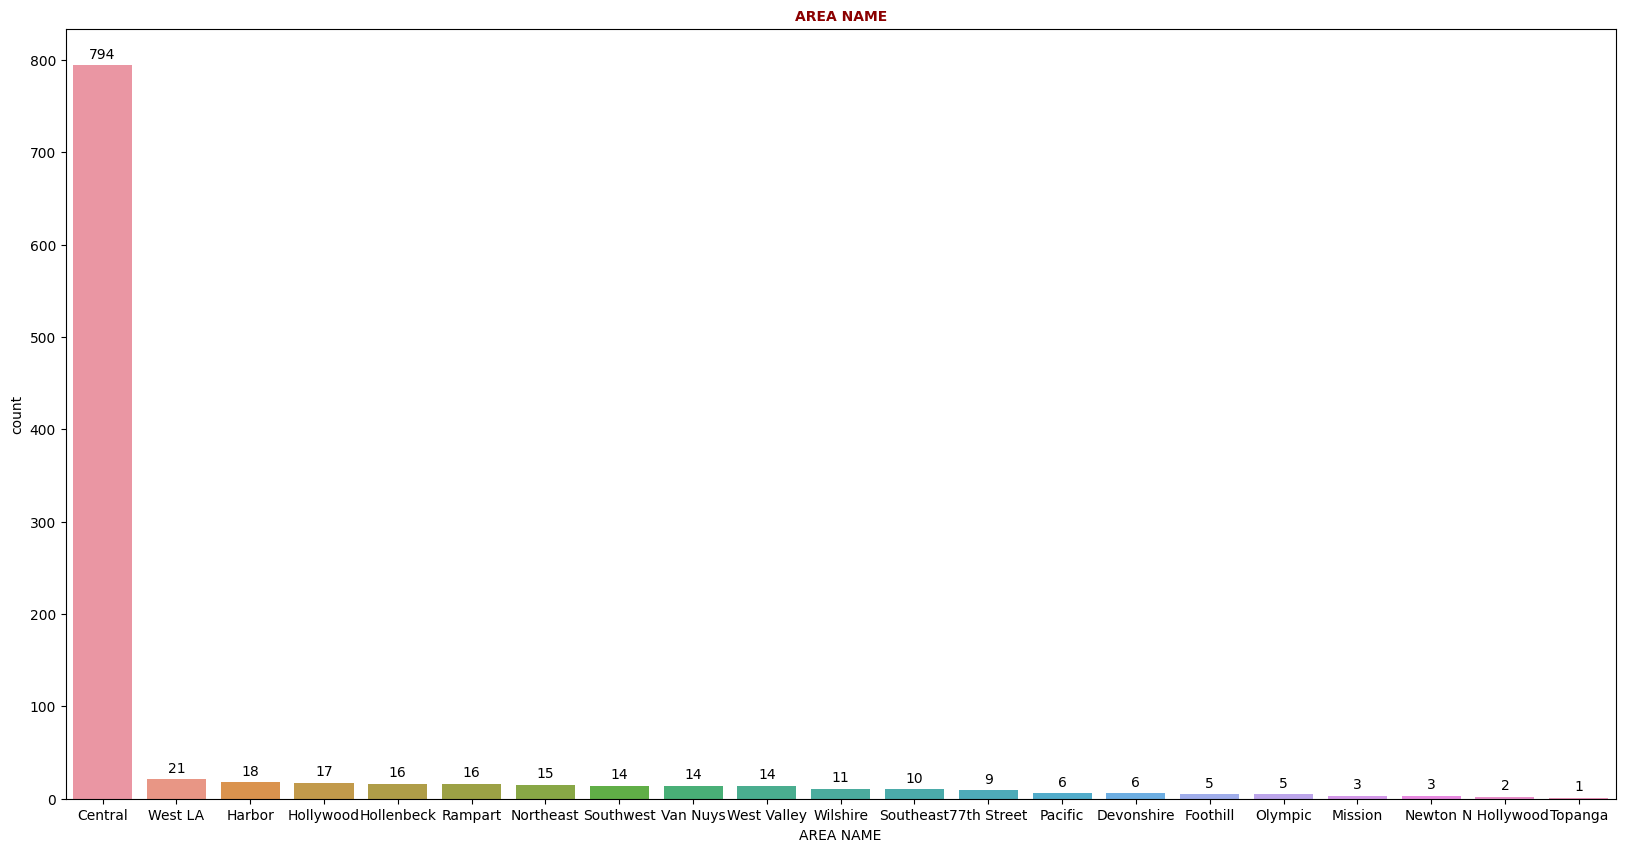

In [32]:
fig,ax = plt.subplots(figsize = (20,10))
sns.countplot(df, x = "AREA NAME", ax = ax,order=df['AREA NAME'].value_counts().index)

for rect in ax.patches:
    height = rect.get_height()
    ax.annotate(text = f"{numerize.numerize(height)}", 
               xy = (rect.get_x()+rect.get_width()/2, height), 
               xytext = (0,3), 
               textcoords = "offset points", 
               ha = "center", 
               va = "bottom", 
               color = "black")
ax.set_title("AREA NAME", fontsize = 10, fontweight = "bold", color = "darkred")
fig.show()

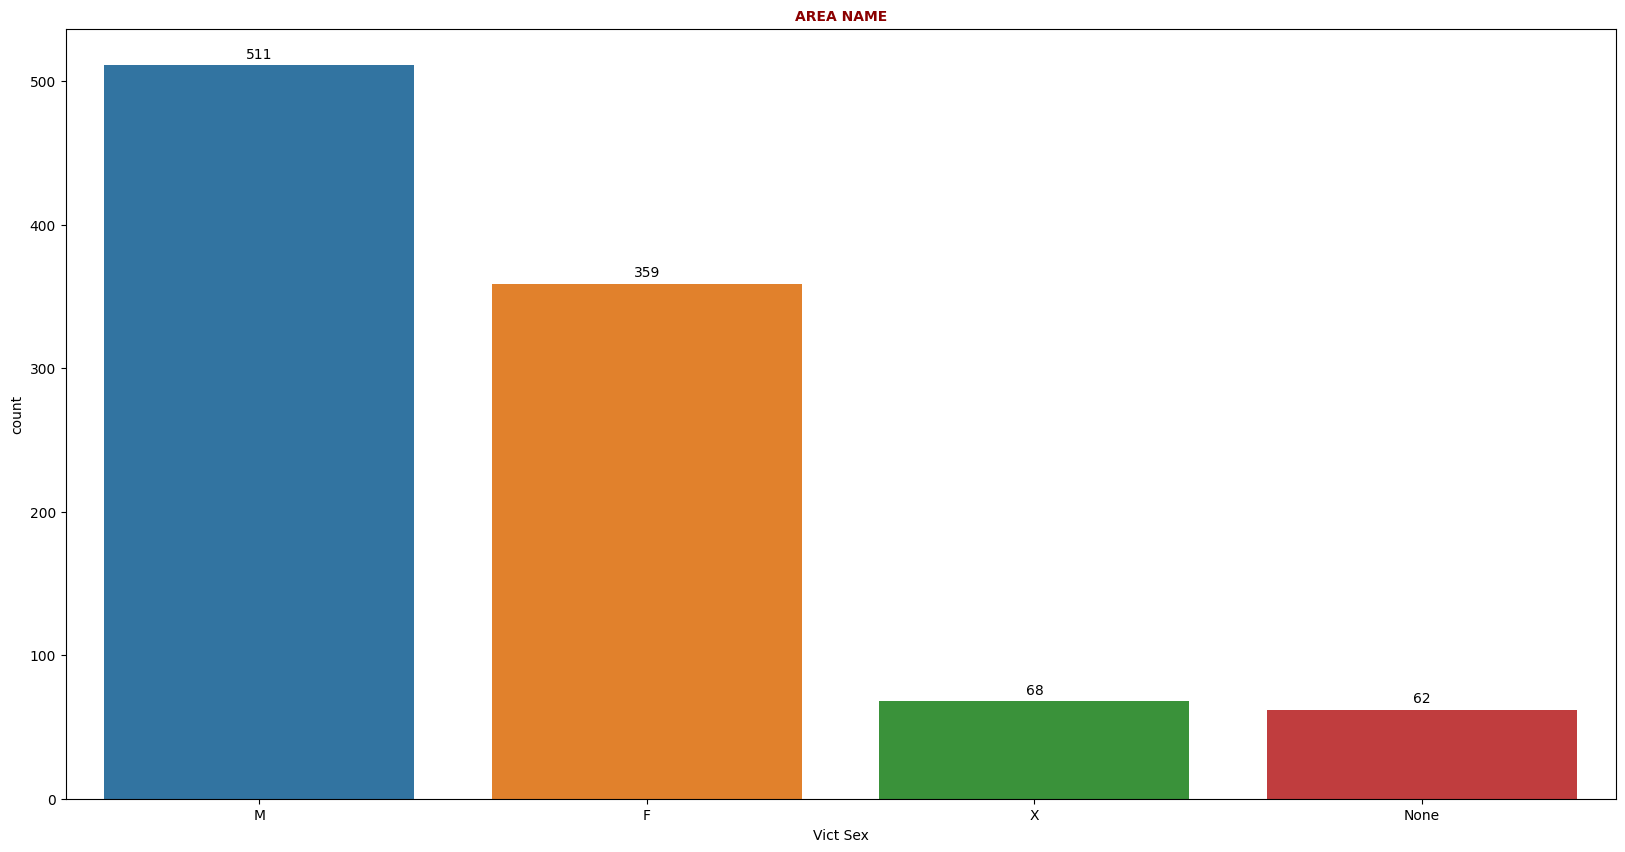

In [33]:
fig,ax = plt.subplots(figsize = (20,10))
sns.countplot(df, x = "Vict Sex", ax = ax,order=df['Vict Sex'].value_counts().index)

for rect in ax.patches:
    height = rect.get_height()
    ax.annotate(text = f"{numerize.numerize(height)}", 
               xy = (rect.get_x()+rect.get_width()/2, height), 
               xytext = (0,3), 
               textcoords = "offset points", 
               ha = "center", 
               va = "bottom", 
               color = "black")
ax.set_title("AREA NAME", fontsize = 10, fontweight = "bold", color = "darkred")
fig.show()

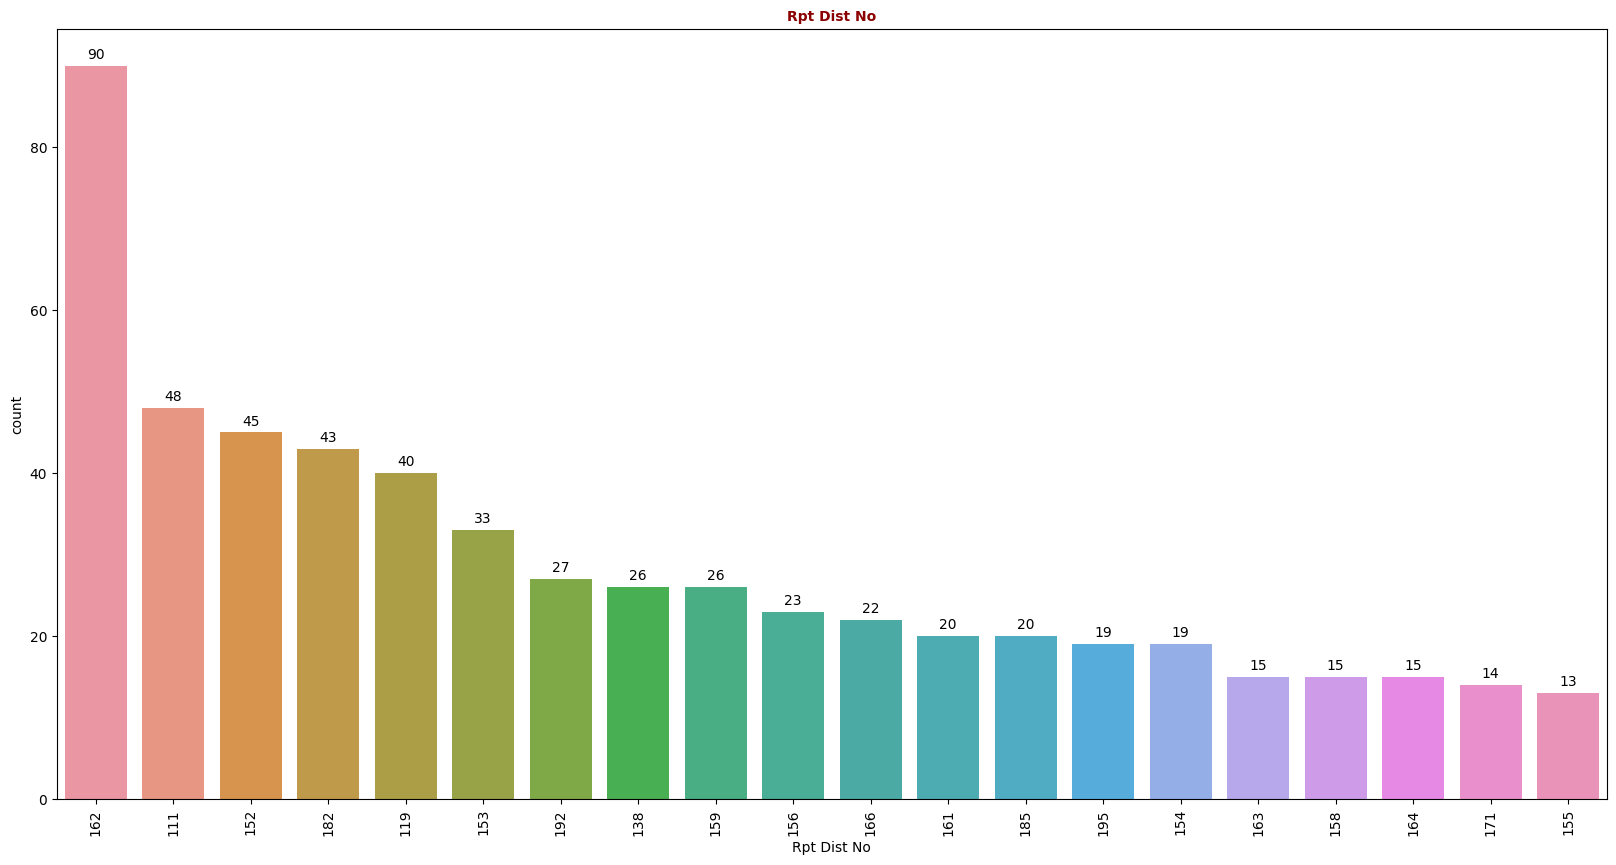

In [34]:
fig,ax = plt.subplots(figsize = (20,10))
sns.countplot(df, x = "Rpt Dist No", ax = ax,order=df['Rpt Dist No'].value_counts().iloc[:20].index)

for rect in ax.patches:
    height = rect.get_height()
    ax.annotate(text = f"{numerize.numerize(height)}", 
               xy = (rect.get_x()+rect.get_width()/2, height), 
               xytext = (0,3), 
               textcoords = "offset points", 
               ha = "center", 
               va = "bottom", 
               color = "black")
ax.set_title("Rpt Dist No", fontsize = 10, fontweight = "bold", color = "darkred")
plt.xticks(rotation=90)
fig.show()

In [35]:
# #Area & Area Number
# fig,ax = plt.subplots(figsize = (20,10))
# sns.barplot(df, x = "AREA NAME",y="AREA", ax = ax,order=df['AREA NAME'].value_counts(ascending=True).index)
# plt.xticks(rotation=90)

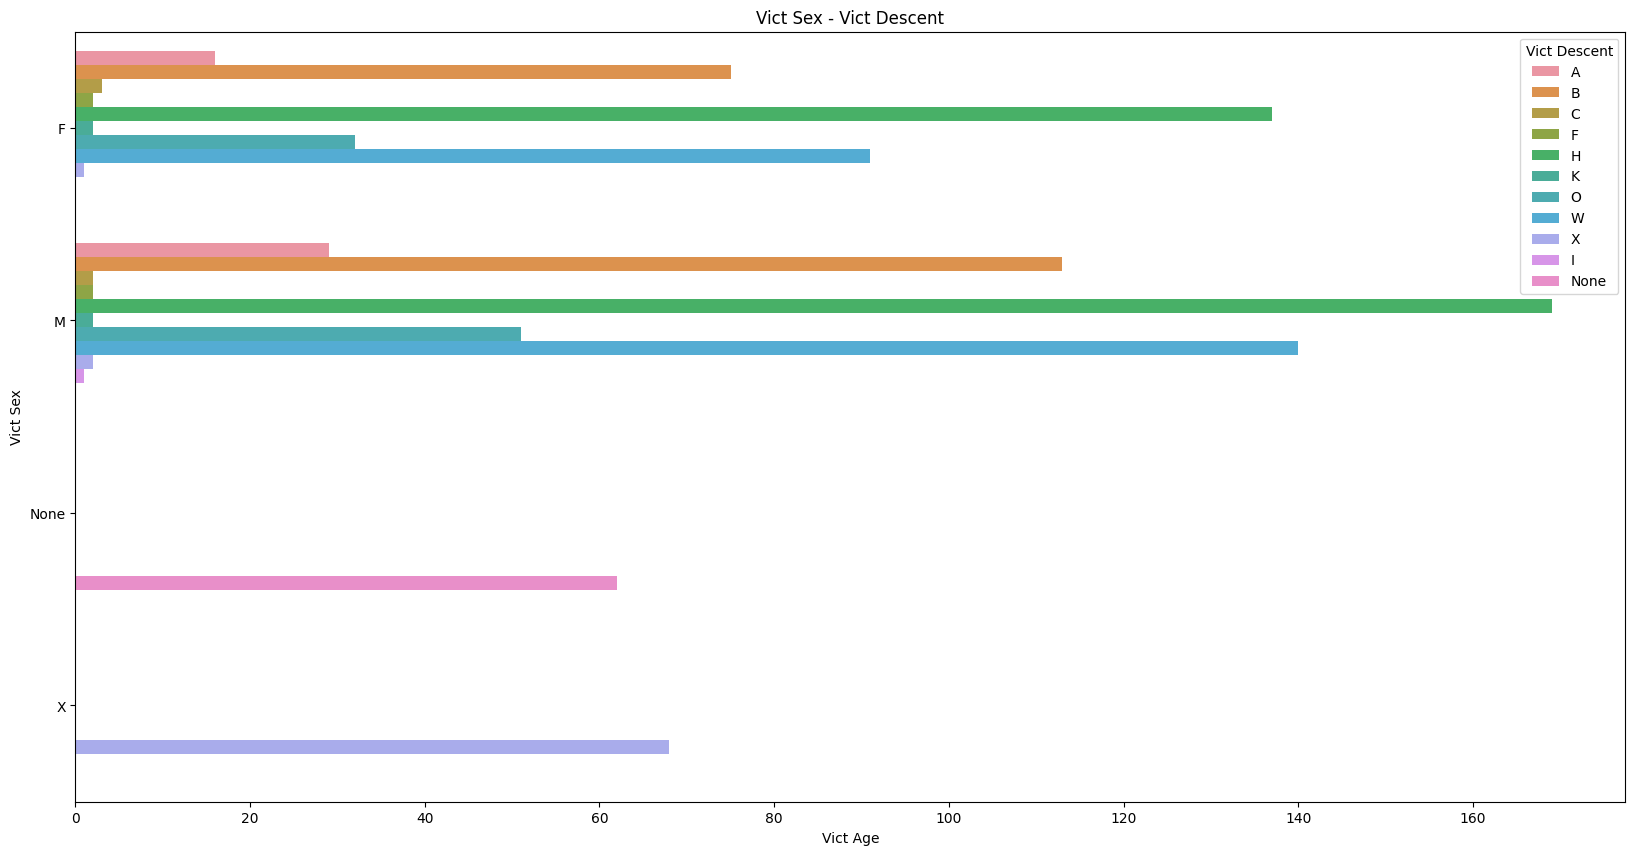

In [36]:
first_dimension = "Vict Sex"
horizontal_label = "Vict Age"
second_dimension = "Vict Descent"

plt.figure(figsize=(20,10))
sns.barplot(x=horizontal_label,
            y=first_dimension,
            hue=second_dimension,
            data=df.groupby([first_dimension, second_dimension]).size().to_frame(horizontal_label).reset_index())
plt.title("Vict Sex - Vict Descent")
plt.show()


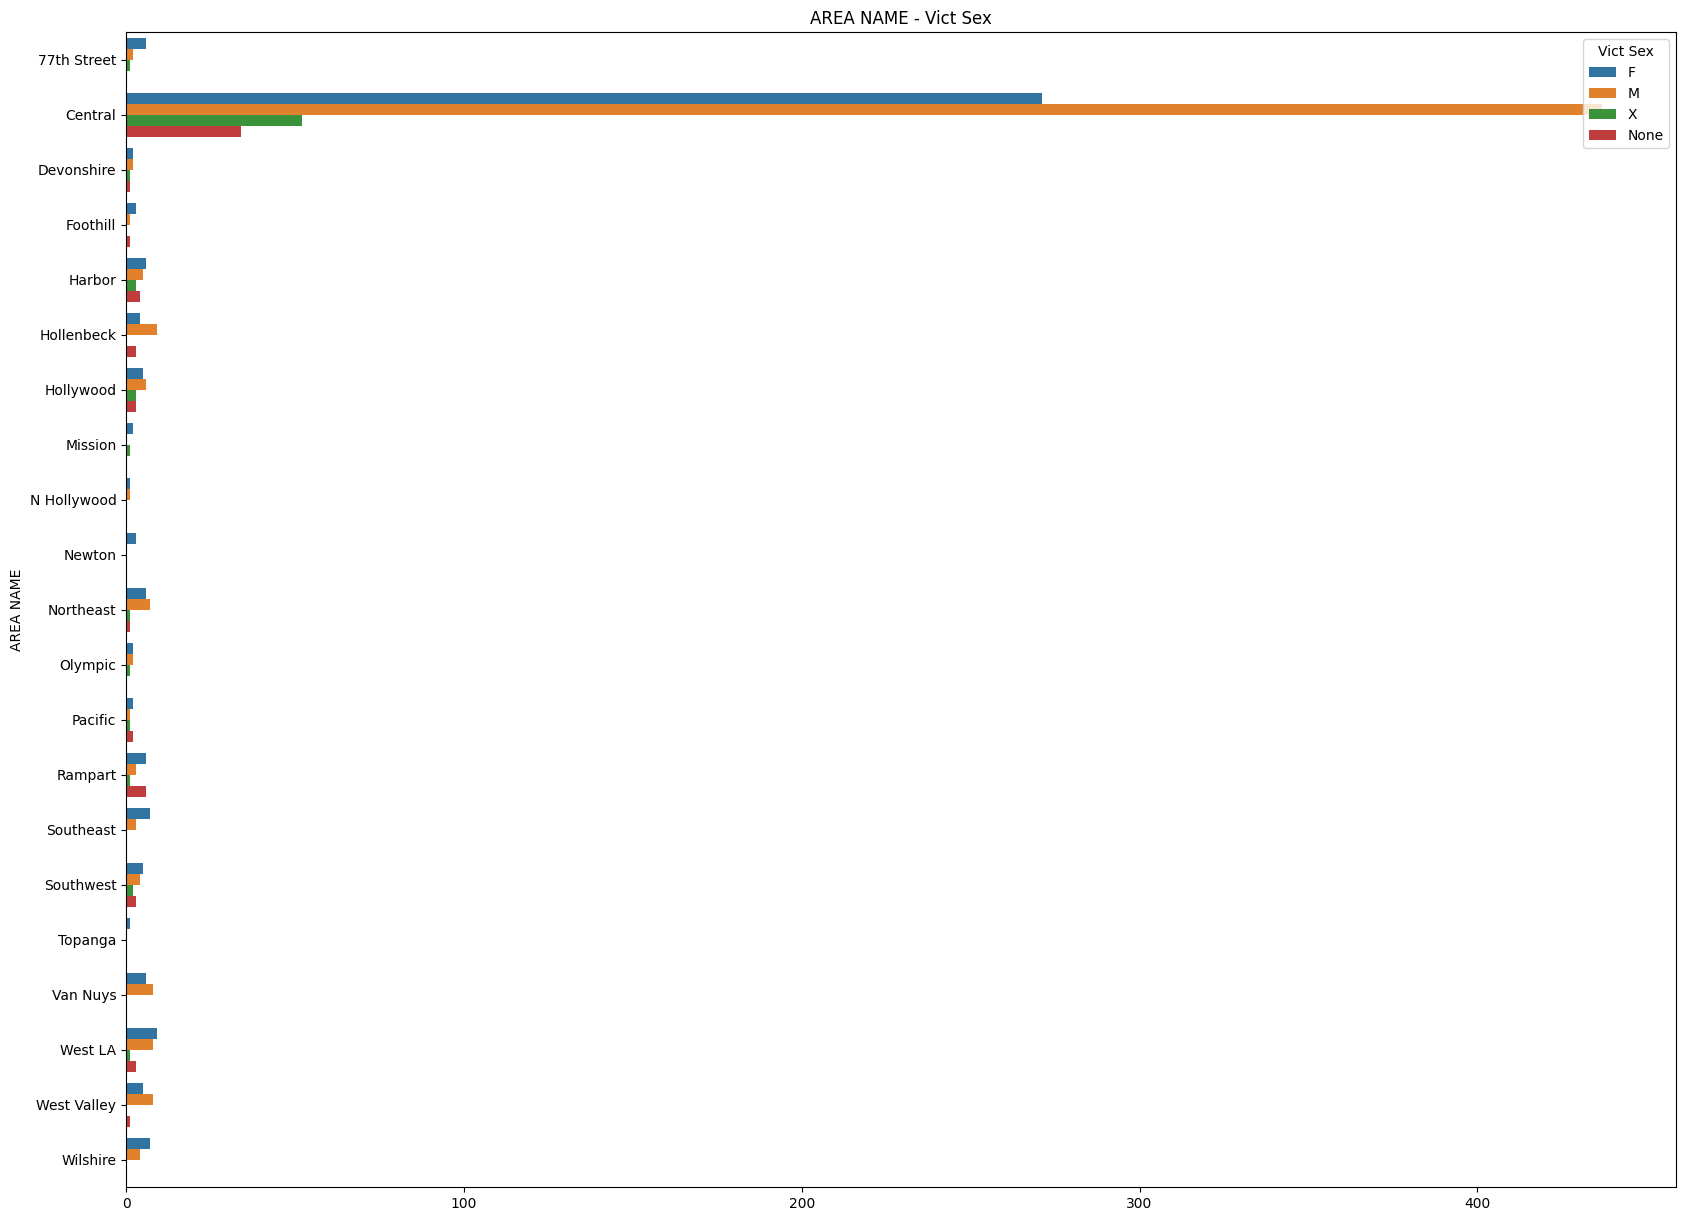

In [37]:
first_dimension = "AREA NAME"
horizontal_label = ""
second_dimension = "Vict Sex"

plt.figure(figsize=(20,15))
sns.barplot(x=horizontal_label,
            y=first_dimension,
            hue=second_dimension,
            data=df.groupby([first_dimension, second_dimension]).size().to_frame(horizontal_label).reset_index())
plt.title("AREA NAME - Vict Sex")
plt.show()


In [38]:
#'DATE OCC' - 'Vict Sex'
fig = px.scatter(df, x='DATE OCC', y='Vict Sex',
              color='Vict Descent')
fig.show()

Text(0.5, 1.0, 'Premis Desc')

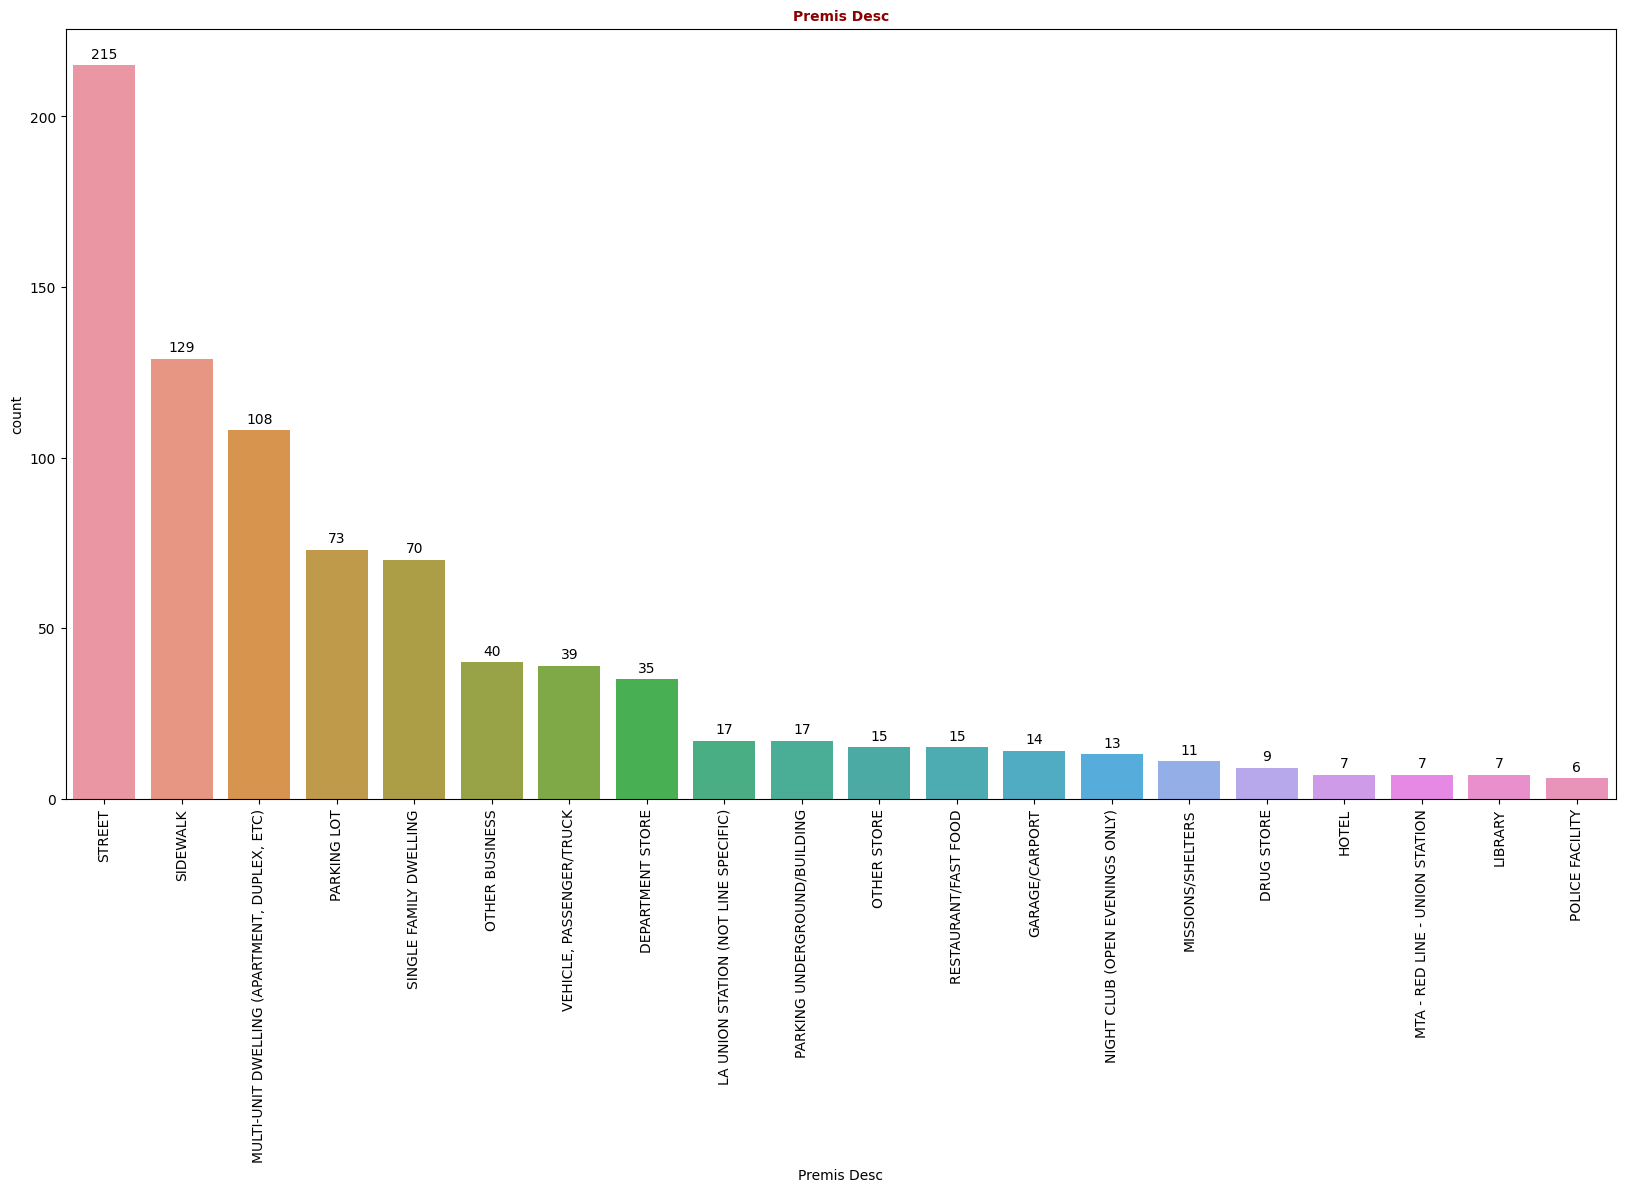

In [39]:
fig,ax = plt.subplots(figsize = (20,10))
sns.countplot(df, x = "Premis Desc", ax = ax,order=df['Premis Desc'].value_counts().iloc[:20].index)

for rect in ax.patches:
    height = rect.get_height()
    ax.annotate(text = f"{numerize.numerize(height)}", 
               xy = (rect.get_x()+rect.get_width()/2, height), 
               xytext = (0,3), 
               textcoords = "offset points", 
               ha = "center", 
               va = "bottom", 
               color = "black")
plt.xticks(rotation=90)
ax.set_title("Premis Desc", fontsize = 10, fontweight = "bold", color = "darkred")

In [40]:
#plot map

color_scale = [(0, 'orange'), (1,'red')]

fig = px.scatter_mapbox(df, 
                        lat="LAT", 
                        lon="LON",
                        zoom=8,
                        color="AREA NAME",
                        hover_data=["Status", "AREA NAME"], 
                        height=1000,
                        width=1500)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()